#### **Assignment No: 02**

**Data Wrangling II**
Create an "Academic performance" dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

Import all required Libraries


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline is used because after this we don't have to write plt.show command to visualize the graph.

In [4]:
df = pd.read_csv('data_students_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.



In [9]:
df['math score'].value_counts()  > 1

math score
65     True
62     True
69     True
59     True
61     True
      ...  
24    False
28    False
33    False
18    False
8     False
Name: count, Length: 81, dtype: bool

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The Features in the dataset are as follows:

In [17]:
print("\n\nThe features in the dataset are as follows : ")
print("1. math score : ", df['math score'].dtype)
print("2. reading score : ", df['reading score'].dtype)
print("3. writing score : ", df['writing score'].dtype)



The features in the dataset are as follows : 
1. math score :  int64
2. reading score :  int64
3. writing score :  int64


<br/>

##### Outliers
In data science, an outlier is a value in a dataset that is much larger or smaller than the other values.
<br/>
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.<br/>
We can easily see the outliers in the dataset by using boxplot. To plot box plot we can use either pyplot or sns.</br>

**Finding Outliers**: There are 2 ways to find outliers.
    1. Z Score
    2. IQR Technique

<Axes: >

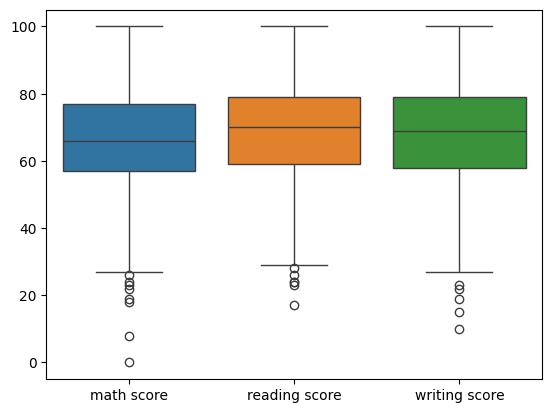

In [40]:
# df.plot(kind="box", subplots=True, layout=(7,2), figsize=(12,15)) 
sns.boxplot(df) # sns to box plot the values that are out side the bars are the outliers

- plt.figure(figsize=(10,4)): Creates a new matplotlib figure with the specified size (width=10 inches, height=4 inches).<br/>
- sns.histplot(df['writing score'], kde=True): Uses Seaborn to plot a histogram of the 'writing score' from the DataFrame df, and overlays a Kernel Density Estimate (KDE) to estimate the probability density function of the variable.<br/>
- sns.despine(): Removes the top and right spines (borders) from the plot, making it visually cleaner.<br/>
- plt.show(): Displays the plot. In a notebook environment, this might be optional as plots are shown automatically, but it's necessary in a script to render the figure window.

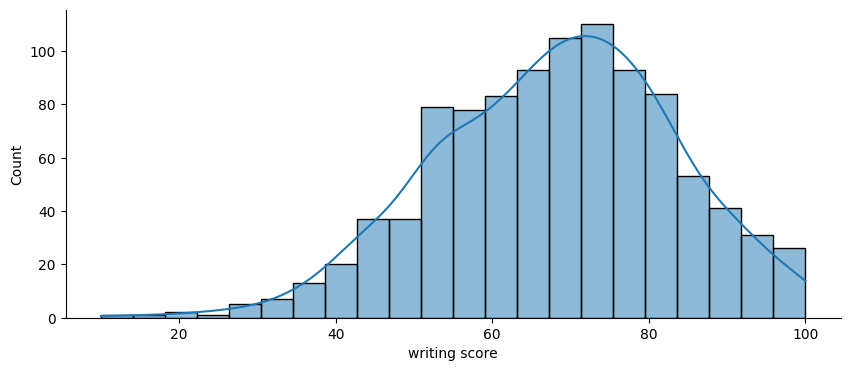

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(df['writing score'], kde=True)
sns.despine()
plt.show()

1. Z-Score to find Outliers:

In [49]:
outliers = []

def detect_outliers_zs(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
    

In [ ]:
sample_outliers_math = detect_outliers_zs(df['math score'])
sample_outliers_reading = detect_outliers_zs(df['reading score'])
smaple_outliers_writing = detect_outliers_zs(df['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(smaple_outliers_writing)


2. IQR to find Outliers 

In [33]:
outliers = []

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data, 75)
    # print(q3, q1)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if (i < lwr_bound or i > upr_bound):
                outliers.append(i)
    return outliers

In [63]:
sample_outliers_math = detect_outliers_iqr(df['math score'])
sample_outliers_reading = detect_outliers_iqr(df['reading score'])
sample_outliers_writing = detect_outliers_iqr(df['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[18, 0, 19, 8, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23, 29, 29, 31, 31, 10, 15, 19, 22, 23]
[18, 0, 19, 8, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23, 29, 29, 31, 31, 10, 15, 19, 22, 23]
[18, 0, 19, 8, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15, 0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23, 29, 29, 31, 31, 10, 15, 19, 22, 23]



**Dealing with Outliers**
We can replce the outliers values with the mean or median value and thus remove outliers from the dataset.

In [64]:

# math_median = np.median(df['math score'])
# for i in sample_outliers_math:
#     df['math score'].replace(to_replace=i, value=math_median, inplace=True)

# reading_median = np.median(df['reading score'])
# for i  in sample_outliers_reading:
#     df['reading score'].replace(to_replace=i, value=reading_median, inplace=True)


# writing_median = np.median(df['writing score'])
# for i in smaple_outliers_writing:
#     df['writing score'].replace(to_replace=i, value=writing_median, inplace=True)

median_math = df['math score'].median()

for i in sample_outliers_math:
    df['math score'].replace(to_replace=i, value=median_math, inplace=True)


median_write = df['writing score'].median()
for i in sample_outliers_writing:
  df['writing score'].replace(to_replace=i, value=median_write, inplace=True)


median_read = df['reading score'].median()
for i in sample_outliers_reading:
    df['reading score'].replace(to_replace=i, value=median_read, inplace=True)


/var/folders/q9/20p2wm9s5bgdmptgbrj9pxg00000gn/T/ipykernel_28544/3217279026.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].replace(to_replace=i, value=median_math, inplace=True)
/var/folders/q9/20p2wm9s5bgdmptgbrj9pxg00000gn/T/ipykernel_28544/3217279026.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

Plotting the boxplot again after removing the outliers, now you can see tere are no outliers.

<Axes: >

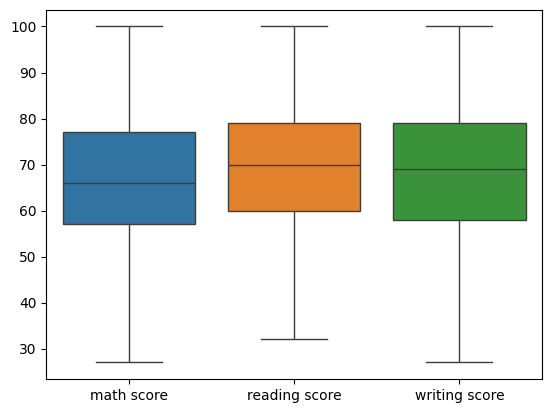

In [66]:
sns.boxplot(df)

Plotting hist plot

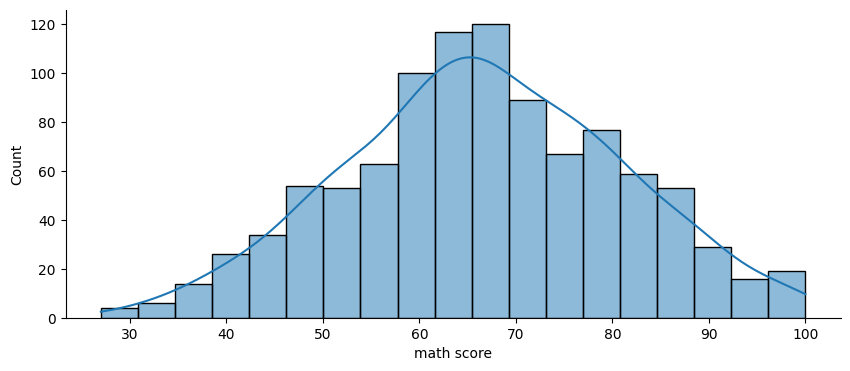

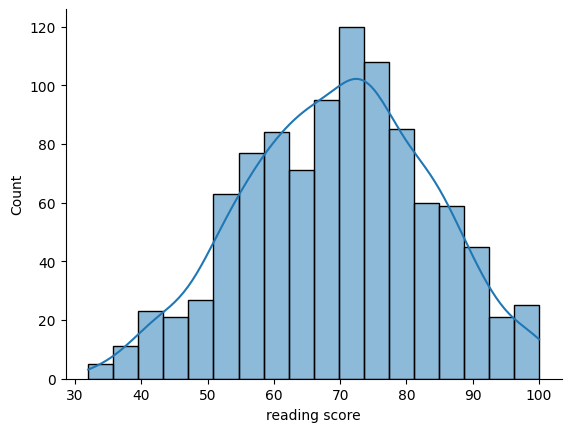

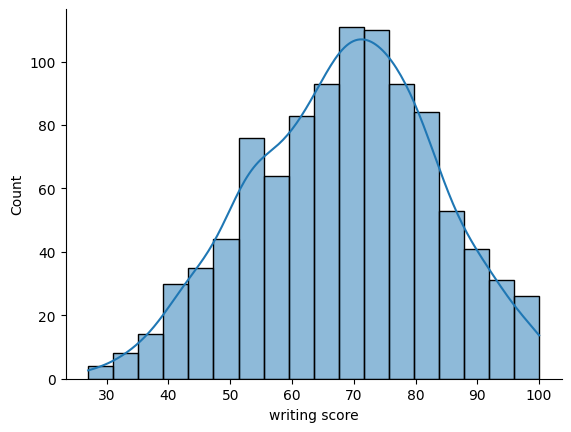

In [69]:
plt.figure(figsize=(10,4))

for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(df[i], kde=True)
    sns.despine()
    plt.show()
    print("\n\n")